# Calculating the first 5 vibrational energy levels for HCl (modelling it as a harmonic oscillator)

<img src="figures/harmonic_oscillator_energy_levels.png" width="550"/>

## Critical equations

Energy levels of a quantum harmonic oscillator:
\begin{equation}
E_n = (n+\frac{1}{2})\hbar\omega
\end{equation}

Natural vibrational frequency, $\omega$:
\begin{equation}
\omega = \sqrt{\frac{k}{m}}
\end{equation}
where $k$ is the bond force constant.

Reduced mass, $m$:
\begin{equation}
m = \frac{m_1m_2}{m_1 + m_2}
\end{equation}

## Code schematic

<img src="figures/code_schematic.svg" width="550"/>

In [1]:
from scipy.constants import hbar
from scipy.constants import physical_constants

import math

J_to_reciprocal_cm = physical_constants['joule-inverse meter relationship'][0] / 100

amu = physical_constants['atomic mass constant'][0]

m1 = 1 * amu # atomic mass of H in kg
m2 = 35 * amu # atomic mass of Cl in kg
HCl_bond_force_constant = 480 # N m^-1

reduced_mass = m1 * m2 / (m1 + m2)
vibrational_frequency = math.sqrt(HCl_bond_force_constant / reduced_mass)
energy_levels = [(n + 0.5) * hbar * vibrational_frequency * J_to_reciprocal_cm for n in range(5)]

print(energy_levels)

[1447.380546391041, 4342.141639173123, 7236.902731955203, 10131.663824737287, 13026.424917519367]


## 1. Organisation

In [2]:
def reduced_mass(m1, m2):
    """Calculate the reduced mass of a diatomic molecule.
    
    Args:
        m1 (float): Mass of atom 1.
        m2 (float): Mass of atom 2.
        
    Returns:
        float
        
    """
    return m1 * m2 / (m1 + m2)

def vibrational_frequency(k, m):
    """Calculate the natural vibrational frequency of a harmonic oscillator.
    
    Args:
        k (float): bond force constant.
        m (float): reduced mass.
        
    Returns:
        float
        
    """
    return math.sqrt(k / m)

def vibrational_energy(n, omega):
    """Calculate the vibrational energy for a harmonic oscillator as a function of vibrational quantum number.
    
    Args:
        n (int): the vibrational quantum number.
        omega (float): the natural vibrational frequency.
        
    Returns:
        float
        
    """
    return (n + 0.5) * hbar * omega

In [3]:
m1 = 1 * amu # atomic mass of H in kg
m2 = 35 * amu # atomic mass of Cl in kg
HCl_bond_force_constant = 480 # N m^-1

m_red = reduced_mass(m1, m2)

omega = vibrational_frequency(HCl_bond_force_constant, m_red)

energy_levels = [vibrational_energy(n, omega) * J_to_reciprocal_cm for n in range(5)]

print(energy_levels)

[1447.380546391041, 4342.141639173123, 7236.902731955203, 10131.663824737287, 13026.424917519367]


## 2. Reusability:

In [4]:
def energy_levels(m1, m2, k, n_max):
    """Returns the n lowest energy levels for a diatomic molecule
    modelled as a harmonic oscillator.
    
    Args:
        m1 (float): Mass of atom 1.
        m2 (float): Mass of atom 2.
        k (float): Bond force constant.
        n_max (float): Maximum energy level to compute.
        
    Returns:
        list
        
    """
    m_red = reduced_mass(m1, m2)
    omega = vibrational_frequency(k, m_red)
    energy_levels = [vibrational_energy(n, omega) * J_to_reciprocal_cm for n in range(n_max)]
    return energy_levels

In [5]:
energy_levels(m1, m2, HCl_bond_force_constant, 5)

[1447.380546391041,
 4342.141639173123,
 7236.902731955203,
 10131.663824737287,
 13026.424917519367]

But now we can also do this for, e.g. DCl.

In [6]:
energy_levels(2.0, m2, HCl_bond_force_constant, 5)

[241.2300910651735,
 723.6902731955206,
 1206.1504553258676,
 1688.6106374562146,
 2171.070819586562]

# 3. Testing:

Not going to demonstrate this, but hopefully you can see how this might allow me to test each function in turn against known data (results calculated by hand in this case).

# 4. Extensibility

What if we want to extend our model to consider an **anharmonic** oscillator (e.g., the potential energy surface is now a Morse potential)?

\begin{equation}
E_v = (v+\frac{1}{2})\hbar\omega - (v+\frac{1}{2})^2\hbar\omega x_\mathrm{e}
\end{equation}

In [15]:
def anharmonic_vibrational_energy(n, omega, x_e=0):
    """Calculate the vibrational energy for Morse oscillator as a function of vibrational quantum number.
    
    Args:
        n (int): the vibrational quantum number.
        omega (float): the natural vibrational frequency.
        x_e (float): the anharmonicity constant.
        
    Returns:
        float
        
    """
    return (n + 0.5) * hbar * omega - (n + 0.5)**2 * hbar * omega * x_e

In [8]:
def anharmonic_energy_levels(m1, m2, k, x_e, n_max):
    """Returns the n lowest energy levels for a diatomic molecule
    modelled as a harmonic oscillator.
    
    Args:
        m1 (float): Mass of atom 1.
        m2 (float): Mass of atom 2.
        k (float): Bond force constant.
        n_max (float): Maximum energy level to compute.
        
    Returns:
        list
        
    """
    m_red = reduced_mass(m1, m2)
    omega = vibrational_frequency(k, m_red)
    energy_levels = [anharmonic_vibrational_energy(n, omega, x_e) * J_to_reciprocal_cm for n in range(n_max)]
    return energy_levels

In [11]:
energy_levels = anharmonic_energy_levels(m1, m2, HCl_bond_force_constant,
                                         x_e=0.05, n_max=5)
energy_levels

[1411.196032731265,
 4016.481016235139,
 6332.289890460803,
 8358.622655408262,
 10095.47931107751]

In [12]:
energy_levels = anharmonic_energy_levels(m1, m2, HCl_bond_force_constant, 0.05, 5)
energy_levels

[1411.196032731265,
 4016.481016235139,
 6332.289890460803,
 8358.622655408262,
 10095.47931107751]

In [13]:
import matplotlib.pyplot as plt

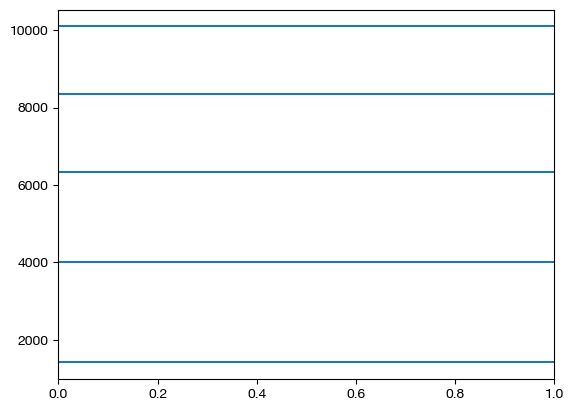

In [14]:
for e in energy_levels:
    plt.axhline(e)

bonus: using optional arguments to support harmonic and anharmonic models in the same function …

In [18]:
anharmonic_vibrational_energy(0, omega)

2.8751430904063944e-20

In [19]:
anharmonic_vibrational_energy(0, omega, x_e=0)

2.8751430904063944e-20